In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom python")
from silvhua import *
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

# import scipy.cluster.hierarchy as sch
import numpy as np
from sklearn.cluster import AgglomerativeClustering

## *Load data*

In [ ]:
flights = load_csv2(r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data',
    'df_with_passangers_2022-10-27_1005.csv',column1_as_index=False, truncate=False)
flights.head()

In [ ]:
# Define a function to fill missing values with the mean value in that column
def fill_with_mean(df,columns,groupby,agg='mean',inplace=True):
    """
    Get the average value in the column.

    Parmaters:
    - Data: `Dataframe groupby().apply()` argument.
    - Columns: Column names on which to perform calculations. Use a list for multiple.
    - agg (string, optional): Aggregate function to apply. Default is mean.
    """

    for column in columns:
        df.loc[:, column].fillna(df.loc[:,column].agg(agg), inplace=True)

    return df



### Drop columns and scale numeric data

In [5]:
numeric_cols = [
       'air_time', 
       'crs_elapsed_time',
       'distance', 'mean_dep_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_week',
       'mean_arr_delay_carrier_origin_week',
       'mean_dep_delay_carrier_origin_date',
       'mean_arr_delay_carrier_origin_date',
       'mean_dep_delay_carrier_origin_date_t-1_week',
       'mean_arr_delay_carrier_origin_date_t-1_week',
       'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
       'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
       ]

cat_cols = [
       'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
       'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
       'arr_hrs_ctg_Night', 'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening',
       'dep_hrs_ctg_Morning', 'dep_hrs_ctg_Night',
       'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'haul_length_long', 'haul_length_medium', 'haul_length_short'
       ]

columns_for_ID = ['op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'month', 'fl_date_year',
       'fl_date_week_number', 
    'crs_dep_time', 'crs_arr_time', 
       'actual_elapsed_time', 
       'arr_delay', 'dep_delay',
       ]

In [6]:
# Drop columns 
ID_columns = flights[columns_for_ID].copy()

flights.drop(labels=columns_for_ID, inplace=True, axis=1)
flights.columns

Index(['crs_elapsed_time', 'air_time', 'distance',
       'mean_dep_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_week',
       'mean_arr_delay_carrier_origin_week',
       'mean_dep_delay_carrier_origin_date',
       'mean_arr_delay_carrier_origin_date',
       'mean_dep_delay_carrier_origin_date_t-1_week',
       'mean_arr_delay_carrier_origin_date_t-1_week',
       'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
       'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
       'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
       'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
       'arr_hrs_ctg_Night', 'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening',
       'dep_hrs_ctg_Morning', 'dep_hrs_ctg_Night', 'day_of_week_Friday',
   

In [7]:
flights[numeric_cols].head()

,air_time,crs_elapsed_time,distance,mean_dep_delay_carrier_origin_month,mean_arr_delay_carrier_origin_month,mean_dep_delay_carrier_origin_week,mean_arr_delay_carrier_origin_week,mean_dep_delay_carrier_origin_date,mean_arr_delay_carrier_origin_date,mean_dep_delay_carrier_origin_date_t-1_week,mean_arr_delay_carrier_origin_date_t-1_week,mean_dep_delay_carrier_origin_date_t-1_week_week_number,mean_arr_delay_carrier_origin_date_t-1_week_week_number
5159,57.0,89,370,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932
5160,45.0,73,241,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932
5161,34.0,60,191,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932
5161,48.0,79,191,5.924051,-2.025478,5.924051,-2.025478,5.924051,-2.025478,5.924051,-2.025478,5.924051,-2.025478
5162,65.0,100,323,2.854037,-2.925000,2.854037,-2.925000,2.854037,-2.925000,2.854037,-2.925000,2.854037,-2.925000


### *PCA*

In [15]:
# Perform PCA: SH 2022-10-27 
def run_pca(df, n_components=2, column_range=None, cluster_col=None):
    """
    Run a PCA, then plot data along the first 2 PC dimensions and the projections.

    Parameters: 
    - col_range: Start and end index for column numbers to include in the model.
        Default is None to include all columns.
    - cluster_col (tuple): Column(s) with cluster ids.

    Return PCA result as a dataframe.

    """
    from sklearn.decomposition import PCA
    import seaborn as sns

    pca = PCA(n_components=n_components)
    if column_range == None:
        columns = df.columns
    else:
        columns = df.columns[column_range[0]:column_range[1]]
    data_scaled = df[columns]
    
    # Apply PCA
    pca.fit(data_scaled)
    data_pca = pca.transform(data_scaled)
    data_pca = pd.DataFrame(data_pca)

    # Get the projections ('loadings') of each dimension along each principal component:
    loadings = pd.DataFrame(pca.components_)

    # rename the columns from the PCA dataframe result
    loadings.columns = columns

    # plot PCA showing both KMeans clusters and AC clusters
    # To plot the raw data along with the loading plot, scale the raw data down:
    xscale = 1/(data_pca[0].max()-data_pca[0].min())
    yscale = 1/(data_pca[1].max()-data_pca[1].min())
    # Make the plots
    fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,5))

    # Plot showing KMeans clusters
    if cluster_col:
        clustering_col1 = df.columns[cluster_col[0]]

        sns.scatterplot(
            x=data_pca[0]*xscale,y=data_pca[1]*yscale,
            hue=df[clustering_col1].values,
            ax=ax[0]
            )
        for feature, vector in loadings.items():
            # Plot each feature using the two principal components as axes
            ax[0].arrow(0,0,vector[0],vector[1]) 
            # Label each arrow at the tip of the line
            if (vector[0] > loadings.loc[0,:].mean()) | (vector[1] > loadings.loc[1,:].mean()):
                ax[0].text(vector[0],vector[1],feature)
                print('Feature vector component above average: ',feature)
        ax[0].set_xlabel('PC1')
        ax[0].set_ylabel('PC2')
        ax[0].set_title(clustering_col1)
        
        # Plot showing AC clusters
        if len(cluster_col) == 2:
            clustering_col2 = df.columns[cluster_col[-1]]
            sns.scatterplot(
                x=data_pca[0]*xscale,y=data_pca[1]*yscale,
                hue=df[clustering_col2].values,
                ax=ax[1]
                )
            for feature, vector in loadings.items():
                # Plot each feature using the two principal components as axes
                ax[1].arrow(0,0,vector[0],vector[1]) 
                # Label each arrow at the tip of the line
                if (vector[0] > loadings.loc[0,:].mean()) | (vector[1] > loadings.loc[1,:].mean()):
                    ax[1].text(vector[0],vector[1],feature)
            ax[1].set_xlabel('PC1')
            ax[1].set_ylabel('PC2')
            ax[1].set_title(clustering_col2)

    return data_pca

In [ ]:
# # Perform PCA:
# def run_pca(df, n_components=2, column_range=(0,-2), cluster_col=(-2,-1)):
#     """
#     Run a PCA, then plot data along the first 2 PC dimensions and the projections.

#     Parameters: 
#     - col_range: Start and end index for column numbers to include in the model.
#         Default assumes that last 2 columns are to be excluded because they
#         contain the cluster numbers.
#         Specify 'None' to include all columns.
#     - cluster_col (tuple): Column(s) with cluster ids.

#     Return PCA result as a dataframe.

#     """
#     from sklearn.decomposition import PCA
#     import seaborn as sns

#     pca = PCA(n_components=n_components)
#     if column_range == None:
#         columns = df.columns
#     else:
#         columns = df.columns[column_range[0]:column_range[1]]
#     data_scaled = df[columns]
    
#     # Apply PCA
#     pca.fit(data_scaled)
#     data_pca = pca.transform(data_scaled)
#     data_pca = pd.DataFrame(data_pca)

#     # Get the projections ('loadings') of each dimension along each principal component:
#     loadings = pd.DataFrame(pca.components_)

#     # rename the columns from the PCA dataframe result
#     loadings.columns = columns

#     # plot PCA showing both KMeans clusters and AC clusters
#     # To plot the raw data along with the loading plot, scale the raw data down:
#     xscale = 1/(data_pca[0].max()-data_pca[0].min())
#     yscale = 1/(data_pca[1].max()-data_pca[1].min())
#     # Make the plots
#     fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,5))

#     # Plot showing KMeans clusters
#     if cluster_col:
#         clustering_col1 = df.columns[cluster_col[0]]

#         sns.scatterplot(
#             x=data_pca[0]*xscale,y=data_pca[1]*yscale,
#             hue=df[clustering_col1].values,
#             ax=ax[0]
#             )
#         for feature, vector in loadings.items():
#             # Plot each feature using the two principal components as axes
#             ax[0].arrow(0,0,vector[0],vector[1]) 
#             # Label each arrow at the tip of the line
#             if (vector[0] > loadings.loc[0,:].mean()) | (vector[1] > loadings.loc[1,:].mean()):
#                 ax[0].text(vector[0],vector[1],feature)
#                 print('Feature vector component above average: ',feature)
#         ax[0].set_xlabel('PC1')
#         ax[0].set_ylabel('PC2')
#         ax[0].set_title(clustering_col1)
        
#         # Plot showing AC clusters
#         if len(cluster_col) == 2:
#             clustering_col2 = df.columns[cluster_col[-1]]
#             sns.scatterplot(
#                 x=data_pca[0]*xscale,y=data_pca[1]*yscale,
#                 hue=df[clustering_col2].values,
#                 ax=ax[1]
#                 )
#             for feature, vector in loadings.items():
#                 # Plot each feature using the two principal components as axes
#                 ax[1].arrow(0,0,vector[0],vector[1]) 
#                 # Label each arrow at the tip of the line
#                 if (vector[0] > loadings.loc[0,:].mean()) | (vector[1] > loadings.loc[1,:].mean()):
#                     ax[1].text(vector[0],vector[1],feature)
#             ax[1].set_xlabel('PC1')
#             ax[1].set_ylabel('PC2')
#             ax[1].set_title(clustering_col2)

#     return data_pca

Feature vector component above average:  crs_elapsed_time
Feature vector component above average:  air_time
Feature vector component above average:  distance
Feature vector component above average:  mean_dep_delay_carrier_origin_month
Feature vector component above average:  mean_arr_delay_carrier_origin_month
Feature vector component above average:  mean_dep_delay_carrier_origin_week
Feature vector component above average:  mean_arr_delay_carrier_origin_week
Feature vector component above average:  mean_dep_delay_carrier_origin_date
Feature vector component above average:  mean_arr_delay_carrier_origin_date
Feature vector component above average:  mean_dep_delay_carrier_origin_date_t-1_week
Feature vector component above average:  mean_arr_delay_carrier_origin_date_t-1_week
Feature vector component above average:  mean_dep_delay_carrier_origin_date_t-1_week_week_number
Feature vector component above average:  mean_arr_delay_carrier_origin_date_t-1_week_week_number
Feature vector compo

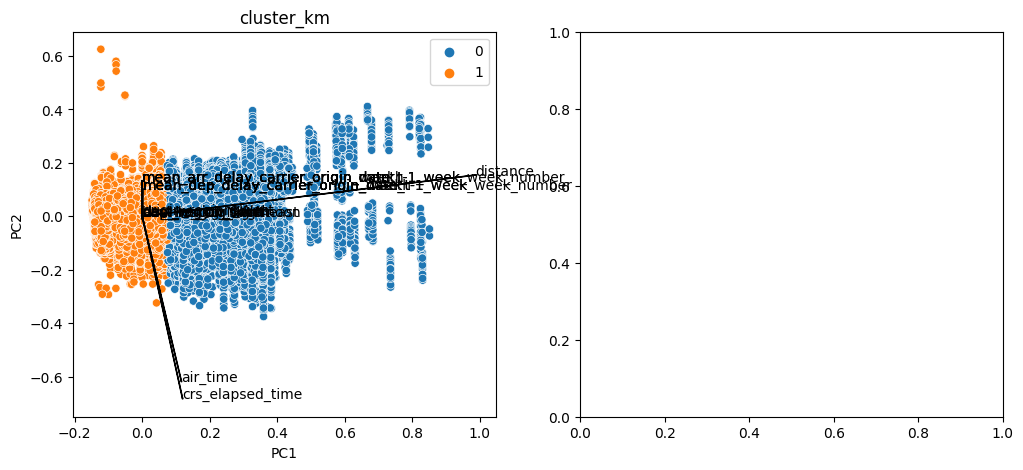

In [16]:
# pca = run_pca(flights, n_components=0.95, cluster_col=(-1,)) # Only run this to make PCA plot
pca = run_pca(flights, n_components=0.95, cluster_col=None)

In [17]:
flights

,crs_elapsed_time,air_time,distance,mean_dep_delay_carrier_origin_month,mean_arr_delay_carrier_origin_month,mean_dep_delay_carrier_origin_week,mean_arr_delay_carrier_origin_week,mean_dep_delay_carrier_origin_date,mean_arr_delay_carrier_origin_date,mean_dep_delay_carrier_origin_date_t-1_week,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,haul_length_long,haul_length_medium,haul_length_short,cluster_km
5159,89,57.0,370,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,...,0,0,0,0,0,0,0,0,1,1
5160,73,45.0,241,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,...,0,0,0,0,0,0,0,0,1,1
5161,60,34.0,191,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,8.587573,...,0,0,0,0,0,0,0,0,1,1
5161,79,48.0,191,5.924051,-2.025478,5.924051,-2.025478,5.924051,-2.025478,5.924051,...,0,0,0,0,0,0,0,0,1,1
5162,100,65.0,323,2.854037,-2.925000,2.854037,-2.925000,2.854037,-2.925000,2.854037,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,156,118.0,862,10.157216,4.031613,10.157216,4.031613,10.157216,4.031613,10.157216,...,0,0,0,1,0,0,0,0,1,1
1426,218,177.0,1440,5.819588,-5.871134,5.819588,-5.871134,5.819588,-5.871134,5.819588,...,0,0,0,1,0,0,0,0,1,0
65,202,173.0,1201,14.379679,8.005348,14.379679,8.005348,14.379679,8.005348,14.379679,...,0,0,0,1,0,0,0,0,1,0
751,112,84.0,602,10.157216,4.031613,10.157216,4.031613,10.157216,4.031613,10.157216,...,0,0,0,1,0,0,0,0,1,1


In [22]:
pca

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-415.722878,4.787506,2.366434,1.953400,1.698777,-0.520627,-0.299450,-0.381755,0.525053,0.871316,...,1.264732e-15,1.566174e-15,-2.754175e-15,-1.280779e-16,-1.112795e-15,9.243211e-16,-4.457624e-16,-1.085710e-15,-1.112086e-16,3.519826e-13
1,-546.225766,3.146570,3.056611,-0.583715,1.067324,-0.497392,-0.798764,-0.430385,-0.406010,0.111091,...,-5.255027e-16,1.011063e-15,-3.170508e-15,1.494779e-16,-1.667906e-15,1.049221e-15,-1.001741e-15,-1.543352e-15,-3.750492e-16,1.286994e-13
2,-598.353811,11.033951,-0.045223,-1.379402,0.686631,-0.957482,-0.793347,-0.512247,-0.367431,-0.002679,...,2.724701e-16,-1.292650e-15,-2.726419e-15,-7.387005e-16,-1.980156e-15,9.659545e-16,-1.168275e-15,-1.578050e-15,-4.652548e-16,-5.815110e-14
3,-594.468310,-15.622597,-4.296403,1.637790,-2.217890,-0.972894,-0.717999,-0.478866,-0.505360,0.041714,...,-1.993747e-16,-1.403672e-15,-2.948464e-15,-1.835890e-16,-3.104257e-15,-3.108020e-16,-2.417276e-15,-1.476569e-15,-2.206050e-15,-3.869617e-14
4,-459.840235,-22.123282,-8.191784,3.129288,2.367969,0.918942,-0.248884,-0.424236,0.458903,0.779218,...,7.651316e-16,1.090067e-16,-3.364797e-15,5.935671e-16,-3.055685e-15,-3.454965e-16,-2.227323e-15,-1.253555e-15,-2.959841e-15,1.797513e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563875,84.489638,-1.416310,7.493155,4.800387,0.715081,-0.479922,0.091552,-0.335465,-0.516268,-0.539525,...,-1.768432e-15,6.779960e-16,8.679281e-16,8.711229e-16,1.086835e-15,3.050248e-16,7.017571e-16,-1.190391e-16,9.195899e-16,3.182601e-15
563876,668.673775,0.670258,-18.507116,7.393184,-5.186303,0.460564,0.515338,-0.193558,0.415667,0.279162,...,-1.314151e-15,4.975847e-16,2.588774e-15,-2.391002e-16,1.954196e-15,-3.058604e-15,1.024102e-16,2.220229e-15,-6.344513e-16,2.958729e-13
563877,430.634569,-9.530916,24.338625,-2.929163,-1.478866,-0.931944,0.606152,-0.373768,0.404361,-0.346582,...,3.484311e-15,-5.710049e-16,2.422240e-15,-1.543612e-15,3.806881e-15,7.109501e-16,2.169333e-15,4.933149e-16,3.024026e-15,-4.374167e-14
563878,-181.076459,9.287991,3.338884,-0.842738,-0.918556,-0.477293,1.121831,-0.365931,-0.428709,0.160904,...,3.548695e-16,1.011063e-15,-1.312726e-16,1.787057e-15,2.819230e-16,1.359128e-17,1.128185e-16,-1.021095e-15,4.477451e-16,1.948106e-13


In [23]:
save_csv(pca, 'pca_', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mid-term-project-I/data/pca_2022-10-27_1056


In [19]:
# save_csv(flights, 'flights_silvia_', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I',
# append_version=True)

In [20]:
# Got memory error when trying to merge the ID columns back with main dataframe
# ID_columns.merge(flights,how='left',left_index=True,right_index=True,copy=False)

# *End of Page*